# 10 minutos para DuckDB: Um guia rápido para proficientes em Python

Bem-vindo a este guia rápido para começar a usar o DuckDB! Se você já é proficiente em Python e está familiarizado com bibliotecas como pandas, este tutorial vai ajudá-lo a entender rapidamente como o DuckDB funciona e como ele pode ser útil para suas análises de dados.

Para este tutorial, usaremos alguns datasets de exemplo que você pode criar facilmente ou baixar:

## O que é DuckDB?

DuckDB é um sistema de banco de dados analítico (OLAP) embutido, projetado para processar dados de forma eficiente. Ele é:
- Semelhante ao SQLite, mas otimizado para análises (e não transações)
- Extremamente rápido para consultas analíticas
- Facilmente integrável com Python e pandas
- Capaz de lidar com dados maiores que a memória disponível

## OLAP x OLTP

* **OLAP: Online Analytical Processing** é um banco de dados que tem como propósito o uso de consultas complexas e processamento analítico. Geralmente são bancos orientados a colunas, ou seja, os dados sao armazenados em colunas, que por sua vez são armazenadas separadamente, sendo armazenados juntos somente os valores referentes a mesma coluna. Exemplos de bancos OLAP: **Google BigQuery, Apache Cassandra e Amazon Redshift**.

* **OLTP: Online Transaction Processing** é um banco de dados com o propósito de armazenar dados transacionais, operações diárias, sendo otimizado para lidar com grandes cargas de escrita e leitura. Sua estrutura é feita para reduzir redundância e garantir a integridade dos dados através da normalização. Normalmente esse tipo de banco os dados são armazenados de maneira linear, onde os dados são armazenados sequencialmente através de linhas, onde cada linha representa um registro ou tupla. Exemplos de bancos OLTP: **MySQL, PostgreSQL e Oracle**.

### Comparação DuckDB vs Outras Soluções

| Característica | DuckDB | SQLite | PostgreSQL | pandas |
|---|---|---|---|---|
| **Análises (OLAP)** | ⭐⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ |
| **Transações (OLTP)** | ⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐ |
| **Facilidade de uso** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Performance analítica** | ⭐⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Escalabilidade** | ⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐ |
| **Integração Python** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ |

### Quando usar DuckDB

**✅ Use DuckDB quando:**
- Precisar de alta performance para consultas analíticas
- Quiser simplicidade (sem administração de servidor)
- Trabalhar com dados maiores que a memória RAM
- Precisar de integração perfeita com Python/pandas
- Quiser processar múltiplos formatos (CSV, Parquet, JSON)
- Fizer análises exploratórias ou prototipagem rápida

**❌ Não use DuckDB quando:**
- Precisar de muitas transações simultâneas (OLTP)
- Quiser distribuição/clustering nativos
- Precisar de alta disponibilidade/replicação
- Tiver equipe não-técnica que precisa de interface gráfica

### Dataset 1: Vendas (CSV)

In [1]:
import pandas as pd
import numpy as np

# Criar dataset de vendas
np.random.seed(42)
data_vendas = {
    'id_venda': range(1, 1001),
    'data': pd.date_range(start='2023-01-01', periods=1000),
    'id_produto': np.random.randint(1, 51, size=1000),
    'id_cliente': np.random.randint(1, 201, size=1000),
    'quantidade': np.random.randint(1, 11, size=1000),
    'valor_unitario': np.random.uniform(10, 500, size=1000).round(2),
}

df_vendas = pd.DataFrame(data_vendas)
df_vendas['valor_total'] = df_vendas['quantidade'] * df_vendas['valor_unitario']
display(df_vendas.head())
df_vendas.to_csv('vendas.csv', index=False)

,id_venda,data,id_produto,id_cliente,quantidade,valor_unitario,valor_total
0,1,2023-01-01,39,121,3,89.19,267.57
1,2,2023-01-02,29,33,6,135.19,811.14
2,3,2023-01-03,15,181,9,473.85,4264.65
3,4,2023-01-04,43,150,6,284.49,1706.94
4,5,2023-01-05,8,21,9,377.86,3400.74


### Dataset 2: Produtos (Parquet)

In [2]:
# Criar dataset de produtos
categorias = ['Eletrônicos', 'Móveis', 'Roupas', 'Alimentos', 'Livros']
subcategorias = {
    'Eletrônicos': ['Celulares', 'Computadores', 'TVs', 'Áudio'],
    'Móveis': ['Sala', 'Quarto', 'Cozinha', 'Escritório'],
    'Roupas': ['Masculino', 'Feminino', 'Infantil', 'Esportes'],
    'Alimentos': ['Perecíveis', 'Não perecíveis', 'Bebidas', 'Congelados'],
    'Livros': ['Ficção', 'Não ficção', 'Acadêmico', 'Infantil']
}

data_produtos = []
for i in range(1, 51):
    categoria = np.random.choice(categorias)
    subcategoria = np.random.choice(subcategorias[categoria])
    data_produtos.append({
        'id_produto': i,
        'nome': f'Produto {i}',
        'categoria': categoria,
        'subcategoria': subcategoria,
        'preco_custo': round(np.random.uniform(5, 300), 2),
        'margem': round(np.random.uniform(0.1, 0.6), 2)
    })

df_produtos = pd.DataFrame(data_produtos)
df_produtos['preco_venda'] = (df_produtos['preco_custo'] * (1 + df_produtos['margem'])).round(2)
display(df_produtos.head())
df_produtos.to_parquet('produtos.parquet')

,id_produto,nome,categoria,subcategoria,preco_custo,margem,preco_venda
0,1,Produto 1,Móveis,Sala,56.35,0.16,65.37
1,2,Produto 2,Eletrônicos,Computadores,185.62,0.21,224.60
2,3,Produto 3,Roupas,Esportes,6.97,0.49,10.39
3,4,Produto 4,Alimentos,Não perecíveis,115.20,0.13,130.18
4,5,Produto 5,Eletrônicos,Celulares,118.76,0.57,186.45


### Dataset 3: Clientes (JSON)

In [3]:
# Criar dataset de clientes
estados = ['SP', 'RJ', 'MG', 'RS', 'PR', 'BA', 'SC', 'PE', 'GO', 'DF']
segmentos = ['Standard', 'Premium', 'VIP']

data_clientes = []
for i in range(1, 201):
    data_clientes.append({
        'id_cliente': i,
        'nome': f'Cliente {i}',
        'email': f'cliente{i}@exemplo.com',
        'estado': np.random.choice(estados),
        'segmento': np.random.choice(segmentos, p=[0.7, 0.2, 0.1]),
        'cadastro': str(pd.Timestamp('2022-01-01') + pd.Timedelta(days=np.random.randint(0, 365))),
        'ultima_compra': str(pd.Timestamp('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365)))
    })

df_clientes = pd.DataFrame(data_clientes)
display(df_clientes.head())
df_clientes.to_json('clientes.json', orient='records')

,id_cliente,nome,email,estado,segmento,cadastro,ultima_compra
0,1,Cliente 1,cliente1@exemplo.com,PE,VIP,2022-05-17 00:00:00,2023-06-24 00:00:00
1,2,Cliente 2,cliente2@exemplo.com,SP,Standard,2022-01-19 00:00:00,2023-07-14 00:00:00
2,3,Cliente 3,cliente3@exemplo.com,DF,Standard,2022-12-20 00:00:00,2023-05-21 00:00:00
3,4,Cliente 4,cliente4@exemplo.com,BA,Standard,2022-04-03 00:00:00,2023-08-27 00:00:00
4,5,Cliente 5,cliente5@exemplo.com,SP,Standard,2022-11-13 00:00:00,2023-10-22 00:00:00


Agora que temos nossos datasets, vamos explorar como o DuckDB pode ser usado para manipulá-los eficientemente.

## Instalação

Primeiro, vamos instalar o DuckDB:

```python
pip install duckdb
```

In [4]:
#!pip install duckdb

## Primeiros passos

Vamos importar o DuckDB e criar uma conexão:

In [5]:
import duckdb

# Conexão em memória (similar ao ':memory:' no SQLite)
#con = duckdb.connect(':memory:') - também pode adicionar o alias ':memory:',
#mas apenas ao instanciar duckdb.connect() ele simplifica a chamada em memória
con = duckdb.connect()

# Alternativamente, para persistir os dados em um arquivo:
# con = duckdb.connect('meu_banco.duckdb')

## Criando tabelas

Você pode criar tabelas diretamente com SQL:

In [6]:
# Criando uma tabela
con.execute("""
DROP TABLE IF EXISTS funcionarios;

CREATE TABLE funcionarios (
    id INTEGER,
    nome VARCHAR,
    departamento VARCHAR,
    salario DECIMAL(10,2)
)
""")

# Inserindo alguns dados
con.execute("""
INSERT INTO funcionarios VALUES
    (1, 'Ana Silva', 'TI', 5000),
    (2, 'Bruno Costa', 'Marketing', 4500),
    (3, 'Carla Mendes', 'TI', 6000),
    (4, 'Daniel Alves', 'RH', 4000)
""")

#exibindo dados recem inseridos
con.sql('select * from funcionarios').show()

┌───────┬──────────────┬──────────────┬───────────────┐
│  id   │     nome     │ departamento │    salario    │
│ int32 │   varchar    │   varchar    │ decimal(10,2) │
├───────┼──────────────┼──────────────┼───────────────┤
│     1 │ Ana Silva    │ TI           │       5000.00 │
│     2 │ Bruno Costa  │ Marketing    │       4500.00 │
│     3 │ Carla Mendes │ TI           │       6000.00 │
│     4 │ Daniel Alves │ RH           │       4000.00 │
└───────┴──────────────┴──────────────┴───────────────┘



## Análise de Performance e Benchmarks

Uma das principais vantagens do DuckDB é sua velocidade. Vamos comparar com pandas:

In [7]:
import time
# Criando um dataset maior para teste de performance
np.random.seed(42)
df_grande = pd.DataFrame({
    'id': range(1000000),
    'categoria': np.random.choice(['A', 'B', 'C', 'D', 'E'], 1000000),
    'valor': np.random.uniform(1, 1000, 1000000),
    'data': pd.date_range('2020-01-01', periods=1000000, freq='1h')
})

# Registrar no DuckDB
con.register('df_grande', df_grande)

# Teste 1: Agregação simples
print("Teste 1: Agregação por categoria")

# DuckDB
start = time.time()
resultado_duckdb = con.execute("""
    SELECT categoria, COUNT(*) as count, AVG(valor) as media
    FROM df_grande
    GROUP BY categoria
""").fetchdf()
tempo_duckdb = time.time() - start

# Pandas
start = time.time()
resultado_pandas = df_grande.groupby('categoria').agg({
    'id': 'count',
    'valor': 'mean'
}).reset_index()
resultado_pandas.columns = ['categoria', 'count', 'media']
tempo_pandas = time.time() - start

print(f"DuckDB: {tempo_duckdb:.4f}s")
print(f"Pandas: {tempo_pandas:.4f}s")
print(f"Speedup: {tempo_pandas/tempo_duckdb:.2f}x")

# Teste 2: Window function complexa
print("\nTeste 2: Window function")

# DuckDB
start = time.time()
resultado_duckdb = con.execute("""
    SELECT 
        *,
        ROW_NUMBER() OVER (PARTITION BY categoria ORDER BY valor DESC) as rank,
        AVG(valor) OVER (PARTITION BY categoria) as media_categoria
    FROM df_grande
    WHERE categoria IN ('A', 'B')
""").fetchdf()
tempo_duckdb = time.time() - start

# Pandas
start = time.time()
df_filtrado = df_grande[df_grande['categoria'].isin(['A', 'B'])].copy()
df_filtrado['rank'] = df_filtrado.groupby('categoria')['valor'].rank(method='first', ascending=False)
df_filtrado['media_categoria'] = df_filtrado.groupby('categoria')['valor'].transform('mean')
tempo_pandas = time.time() - start

print(f"DuckDB: {tempo_duckdb:.4f}s")
print(f"Pandas: {tempo_pandas:.4f}s")
print(f"Speedup: {tempo_pandas/tempo_duckdb:.2f}x")

Teste 1: Agregação por categoria
DuckDB: 0.0133s
Pandas: 0.0333s
Speedup: 2.50x

Teste 2: Window function
DuckDB: 0.2602s
Pandas: 0.1357s
Speedup: 0.52x


## Integração com pandas

Uma das grandes vantagens do DuckDB é sua integração perfeita com pandas:

In [8]:
# Criando um DataFrame
df = pd.DataFrame({
    'id': [5, 6, 7, 8],
    'nome': ['Eduardo Lima', 'Fernanda Santos', 'Gabriel Oliveira', 'Helena Pereira'],
    'departamento': ['Marketing', 'TI', 'Vendas', 'RH'],
    'salario': [4800, 5500, 4200, 4100]
})

# Registrando um DataFrame como uma tabela no DuckDB
con.register('df_funcionarios', df)

# Agora você pode consultar esse DataFrame como uma tabela SQL
resultado = con.execute("""
    SELECT * FROM df_funcionarios
    WHERE departamento = 'TI'
""").fetchdf()

print(resultado)

   id             nome departamento  salario
0   6  Fernanda Santos           TI     5500


## Lendo nossos datasets no DuckDB

Vamos ler os datasets que criamos:

In [9]:
# Ler o arquivo CSV de vendas
con.execute("CREATE OR REPLACE TABLE vendas AS SELECT * FROM read_csv_auto('vendas.csv')")

# Ler o arquivo Parquet de produtos
con.execute("CREATE OR REPLACE TABLE produtos AS SELECT * FROM read_parquet('produtos.parquet')")

# Ler o arquivo JSON de clientes
con.execute("CREATE OR REPLACE TABLE clientes AS SELECT * FROM read_json('clientes.json', auto_detect=TRUE)")

# Verificar as tabelas criadas
print("Tabela de vendas:")
display(con.execute("SELECT * FROM vendas LIMIT 5").fetchdf())

print("\nTabela de produtos:")
display(con.execute("SELECT * FROM produtos LIMIT 5").fetchdf())

print("\nTabela de clientes:")
display(con.execute("SELECT * FROM clientes LIMIT 5").fetchdf())

Tabela de vendas:


,id_venda,data,id_produto,id_cliente,quantidade,valor_unitario,valor_total
0,1,2023-01-01,39,121,3,89.19,267.57
1,2,2023-01-02,29,33,6,135.19,811.14
2,3,2023-01-03,15,181,9,473.85,4264.65
3,4,2023-01-04,43,150,6,284.49,1706.94
4,5,2023-01-05,8,21,9,377.86,3400.74



Tabela de produtos:


,id_produto,nome,categoria,subcategoria,preco_custo,margem,preco_venda
0,1,Produto 1,Móveis,Sala,56.35,0.16,65.37
1,2,Produto 2,Eletrônicos,Computadores,185.62,0.21,224.60
2,3,Produto 3,Roupas,Esportes,6.97,0.49,10.39
3,4,Produto 4,Alimentos,Não perecíveis,115.20,0.13,130.18
4,5,Produto 5,Eletrônicos,Celulares,118.76,0.57,186.45



Tabela de clientes:


,id_cliente,nome,email,estado,segmento,cadastro,ultima_compra
0,1,Cliente 1,cliente1@exemplo.com,PE,VIP,2022-05-17,2023-06-24
1,2,Cliente 2,cliente2@exemplo.com,SP,Standard,2022-01-19,2023-07-14
2,3,Cliente 3,cliente3@exemplo.com,DF,Standard,2022-12-20,2023-05-21
3,4,Cliente 4,cliente4@exemplo.com,BA,Standard,2022-04-03,2023-08-27
4,5,Cliente 5,cliente5@exemplo.com,SP,Standard,2022-11-13,2023-10-22


## Consultas analíticas

Agora, vamos realizar algumas consultas analíticas:

In [10]:
# Total de vendas por categoria de produto
resultado = con.execute("""
    SELECT
        p.categoria,
        COUNT(*) as num_vendas,
        SUM(v.valor_total) as valor_total,
        AVG(v.valor_total) as ticket_medio
    FROM vendas v
    JOIN produtos p ON v.id_produto = p.id_produto
    GROUP BY p.categoria
    ORDER BY valor_total DESC
""").df() #fetchdf() também é abreviado como df()

print("Vendas por categoria:")
display(resultado)

# Vendas por estado e segmento de cliente
resultado = con.execute("""
    SELECT
        c.estado,
        c.segmento,
        COUNT(*) as num_vendas,
        SUM(v.valor_total) as valor_total
    FROM vendas v
    JOIN clientes c ON v.id_cliente = c.id_cliente
    GROUP BY c.estado, c.segmento
    ORDER BY valor_total DESC
""").df()

print("\nVendas por estado e segmento:")
display(resultado)

Vendas por categoria:


,categoria,num_vendas,valor_total,ticket_medio
0,Eletrônicos,276,378976.70,1373.103986
1,Móveis,208,307605.40,1478.872115
2,Roupas,200,297229.11,1486.145550
3,Alimentos,181,259109.67,1431.545138
4,Livros,135,182941.65,1355.123333



Vendas por estado e segmento:


,estado,segmento,num_vendas,valor_total
0,SC,Standard,108,155914.13
1,PE,Standard,81,126889.00
2,RJ,Standard,72,106875.74
3,PR,Standard,77,99652.83
4,SP,Standard,76,93833.78
5,MG,Standard,69,91640.71
6,BA,Standard,47,76707.34
7,RS,Standard,41,65290.27
8,GO,Standard,40,60853.83
9,DF,Standard,52,57798.11


## Executando consultas SQL

O DuckDB suporta a maioria das funções SQL padrão:

In [11]:
con.execute("""
DROP TABLE IF EXISTS funcionarios;

CREATE TABLE funcionarios (
    id INTEGER,
    nome VARCHAR,
    departamento VARCHAR,
    salario DECIMAL(10,2)
)
""")

# Inserindo alguns dados
con.execute("""
INSERT INTO funcionarios VALUES
    (1, 'Ana Silva', 'TI', 5000),
    (2, 'Bruno Costa', 'Marketing', 4500),
    (3, 'Carla Mendes', 'TI', 6000),
    (4, 'Daniel Alves', 'RH', 4000)
""")

# Simples SELECT
resultado = con.execute("""
    SELECT departamento, COUNT(*) as total, AVG(salario) as media_salarial
    FROM funcionarios
    GROUP BY departamento
    ORDER BY media_salarial DESC
""").df()

display(resultado)

,departamento,total,media_salarial
0,TI,2,5500.0
1,Marketing,1,4500.0
2,RH,1,4000.0


## Combinando tabelas

Você pode juntar tabelas assim como faria no SQL padrão:

In [12]:
# Juntando a tabela criada manualmente com os dados do DataFrame
resultado = con.execute("""
    SELECT a.nome, a.departamento, a.salario
    FROM funcionarios a
    UNION ALL
    SELECT b.nome, b.departamento, b.salario
    FROM df_funcionarios b
""").df()

display(resultado)

,nome,departamento,salario
0,Ana Silva,TI,5000.0
1,Bruno Costa,Marketing,4500.0
2,Carla Mendes,TI,6000.0
3,Daniel Alves,RH,4000.0
4,Eduardo Lima,Marketing,4800.0
5,Fernanda Santos,TI,5500.0
6,Gabriel Oliveira,Vendas,4200.0
7,Helena Pereira,RH,4100.0


## Trabalhando com tabelas temporárias

Às vezes, você vai querer criar tabelas temporárias para etapas intermediárias:

In [13]:
# Criando uma visualização temporária
con.execute("""
    CREATE OR REPLACE TEMP VIEW ti_funcionarios AS
    SELECT * FROM funcionarios WHERE departamento = 'TI'
    UNION ALL
    SELECT * FROM df_funcionarios WHERE departamento = 'TI'
""")

# Usando a visualização
resultado = con.execute("SELECT * FROM ti_funcionarios").df()
display(resultado)

,id,nome,departamento,salario
0,1,Ana Silva,TI,5000.0
1,3,Carla Mendes,TI,6000.0
2,6,Fernanda Santos,TI,5500.0


## Conversão entre DuckDB e pandas

É fácil converter resultados do DuckDB para pandas e vice-versa:

In [14]:
# DuckDB para pandas
query_resultado = con.execute("SELECT * FROM funcionarios")
df_resultado = query_resultado.df()  # Converte para pandas DataFrame
print(type(df_resultado))

# Pandas para DuckDB (já vimos isso com register)
novo_df = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})
con.register('novo_df_tabela', novo_df)
con.execute("SELECT * FROM novo_df_tabela").fetchall()

<class 'pandas.core.frame.DataFrame'>


[(1, 'a'), (2, 'b'), (3, 'c')]

## Funções Definidas pelo Usuário (UDFs)

Uma das características poderosas do DuckDB é a capacidade de criar Funções Definidas pelo Usuário (UDFs). Vamos explorar como criar e usar UDFs em DuckDB:

### UDFs em Python

O DuckDB permite registrar funções Python como UDFs:

In [15]:
from duckdb.typing import *

# sintaxe para criar uma função
# con.create_function(name, function, parameters, return_type)

# Registrar uma função Python simples como UDF
def calcular_desconto(valor, percentual):
    return valor * (1 - percentual/100)

# os parametros são adicionados em lista: [valor->DOUBLE, percentual->INTEGER]
# é adicionado o type DOUBLE para o resultado que será devolvido pela função
con.create_function('calcular_desconto', calcular_desconto, [DOUBLE, INTEGER], DOUBLE)

# para remover a função basta chamar a seguinte sintaxe
# con.remove_function('calcular_desconto')

# Usar a UDF em uma consulta SQL
resultado = con.execute("""
    SELECT
        id_venda,
        valor_total,
        calcular_desconto(valor_total, 10) as valor_com_desconto
    FROM vendas
    LIMIT 10
""").df()

print("Aplicando desconto com UDF:")
display(resultado)

Aplicando desconto com UDF:


,id_venda,valor_total,valor_com_desconto
0,1,267.57,240.813
1,2,811.14,730.026
2,3,4264.65,3838.185
3,4,1706.94,1536.246
4,5,3400.74,3060.666
5,6,1983.87,1785.483
6,7,2526.57,2273.913
7,8,112.26,101.034
8,9,1427.12,1284.408
9,10,1187.12,1068.408


### UDFs para transformações mais complexas

In [16]:
# UDF para classificar clientes por valor de compra
def classificar_compra(valor):
    if valor < 100:
        return 'Pequena'
    elif valor < 500:
        return 'Média'
    else:
        return 'Grande'

con.create_function('classificar_compra', classificar_compra, [DOUBLE], VARCHAR)

# Usar a UDF em uma análise
resultado = con.execute("""
    SELECT
        classificar_compra(valor_total) as tamanho_compra,
        COUNT(*) as num_vendas,
        SUM(valor_total) as valor_total
    FROM vendas
    GROUP BY classificar_compra(valor_total)
    ORDER BY valor_total DESC
""").df()

print("\nClassificação de compras:")
display(resultado)


Classificação de compras:


,tamanho_compra,num_vendas,valor_total
0,Grande,730,1355092.50
1,Média,228,68296.90
2,Pequena,42,2473.13


### UDFs para processamento de texto

In [17]:
# UDF para formatar emails
def formatar_email(nome, dominio):
    nome_formatado = nome.lower().replace(' ', '.')
    return f"{nome_formatado}@{dominio}"

con.create_function('formatar_email', formatar_email, [VARCHAR, VARCHAR], VARCHAR)

# Aplicar a UDF
resultado = con.execute("""
    SELECT
        id_cliente,
        nome,
        formatar_email(nome, 'novaempresa.com') as novo_email
    FROM clientes
    LIMIT 10
""").df()

print("\nEmails formatados:")
display(resultado)


Emails formatados:


,id_cliente,nome,novo_email
0,1,Cliente 1,cliente.1@novaempresa.com
1,2,Cliente 2,cliente.2@novaempresa.com
2,3,Cliente 3,cliente.3@novaempresa.com
3,4,Cliente 4,cliente.4@novaempresa.com
4,5,Cliente 5,cliente.5@novaempresa.com
5,6,Cliente 6,cliente.6@novaempresa.com
6,7,Cliente 7,cliente.7@novaempresa.com
7,8,Cliente 8,cliente.8@novaempresa.com
8,9,Cliente 9,cliente.9@novaempresa.com
9,10,Cliente 10,cliente.10@novaempresa.com


### UDFs com pandas

É possível usar pandas dentro de UDFs para operações mais complexas:

In [18]:
# UDF que usa pandas internamente
def obter_media_movel_para_dia(dias, valores, janela, dia_alvo):
    # Converter para DataFrame pandas
    df = pd.DataFrame({'dia': dias, 'valor': valores})
    # Calcular média móvel
    df['media_movel'] = df['valor'].rolling(window=janela, min_periods=1).mean()
    # Encontrar o valor para o dia alvo
    try:
        return float(df.loc[df['dia'] == dia_alvo, 'media_movel'].iloc[0])
    except (IndexError, KeyError):
        return None

# Preparar dados para teste
con.execute("""
    CREATE OR REPLACE TABLE serie_temporal AS
    SELECT
        ROW_NUMBER() OVER() as dia,
        RANDOM() * 100 as valor
    FROM range(1, 31)
""")

# Registrar a função
#con.remove_function('obter_media_movel_para_dia')
con.create_function('obter_media_movel_para_dia', 
                   obter_media_movel_para_dia, 
                   ['BIGINT[]', 'DOUBLE[]', 'INTEGER', 'BIGINT'], 
                   'DOUBLE')

# Aplicar a UDF para média móvel
resultado = con.execute("""
WITH dados AS (
    SELECT ARRAY_AGG(dia ORDER BY dia) AS todos_dias,
           ARRAY_AGG(valor ORDER BY dia) AS todos_valores
    FROM serie_temporal
)
SELECT
    t.dia,
    t.valor,
    obter_media_movel_para_dia(d.todos_dias, d.todos_valores, 7, t.dia) AS media_movel_7d
FROM serie_temporal t
CROSS JOIN dados d
ORDER BY t.dia
""").df()

print("\nMedia móvel pra cada dia:")
display(resultado)


Media móvel pra cada dia:


,dia,valor,media_movel_7d
0,1,88.467382,88.467382
1,2,36.456068,62.461725
2,3,17.964173,47.629208
3,4,51.399140,48.571691
4,5,33.981281,45.653609
5,6,30.426987,43.115839
6,7,33.028854,41.674841
7,8,95.998538,42.750720
8,9,10.203348,39.000332
9,10,12.090833,38.161283


### UDFs com vetorização

Para melhor performance, DuckDB suporta UDFs vetorizadas:

In [19]:
# UDF vetorizada para calcular o z-score
def calcular_zscore(valores):
    valores_np = np.array(valores)
    media = np.mean(valores_np)
    desvio = np.std(valores_np)
    return (valores_np - media) / (desvio if desvio > 0 else 1)

con.create_function('calcular_zscore', calcular_zscore, ['DOUBLE[]'], 'DOUBLE[]')

# Aplicar a UDF vetorizada
resultado = con.execute("""
    WITH dados_venda AS (
        SELECT
            EXTRACT(MONTH FROM data) as mes,
            SUM(valor_total) as valor_total
        FROM vendas
        GROUP BY mes
    ),
    todos_valores AS (
        SELECT array_agg(valor_total) as todos_valores
        FROM dados_venda
    )
    SELECT
        d.mes,
        d.valor_total,
        calcular_zscore(t.todos_valores)[array_position(t.todos_valores, d.valor_total)] as zscore
    FROM dados_venda d, todos_valores t
    ORDER BY d.mes
""").df()

print("\nZ-scores usando UDF vetorizada:")
display(resultado)


Z-scores usando UDF vetorizada:


,mes,valor_total,zscore
0,1,143042.50,1.274153
1,2,128750.93,0.522329
2,3,135429.63,0.873669
3,4,111930.68,-0.362519
4,5,105366.95,-0.707811
5,6,139239.34,1.074083
6,7,131614.24,0.672956
7,8,125338.72,0.342826
8,9,126984.05,0.429380
9,10,98772.42,-1.054724


## UDFs com retorno de múltiplas colunas

In [20]:
# UDF que retorna múltiplas colunas via dicionário
def analisar_texto(texto):
    return {
        'comprimento': len(texto),
        'palavras': len(texto.split()),
        'maiusculas': sum(1 for c in texto if c.isupper()),
        'digitos': sum(1 for c in texto if c.isdigit())
    }

#con.remove_function('analisar_texto')
con.create_function('analisar_texto', analisar_texto, ['VARCHAR'], 
                   duckdb.struct_type({
                       'comprimento': 'INTEGER',
                       'palavras': 'INTEGER',
                       'maiusculas': 'INTEGER',
                       'digitos': 'INTEGER'
                   }))

# Aplicar a UDF multivalor
resultado = con.execute("""
    SELECT
        id_cliente,
        nome,
        analisar_texto(nome) as analise
    FROM clientes
    LIMIT 5
""").df()

print("\nAnálise de texto multivalor:")
display(resultado)


Análise de texto multivalor:


,id_cliente,nome,analise
0,1,Cliente 1,"{'comprimento': 9, 'palavras': 2, 'maiusculas'..."
1,2,Cliente 2,"{'comprimento': 9, 'palavras': 2, 'maiusculas'..."
2,3,Cliente 3,"{'comprimento': 9, 'palavras': 2, 'maiusculas'..."
3,4,Cliente 4,"{'comprimento': 9, 'palavras': 2, 'maiusculas'..."
4,5,Cliente 5,"{'comprimento': 9, 'palavras': 2, 'maiusculas'..."


## Análises avançadas com nossos datasets

Vamos combinar nossos conhecimentos e realizar algumas análises mais avançadas usando nossos datasets de exemplo:

In [21]:
# Análise de vendas por mês, com tendência
resultado = con.execute("""
    WITH vendas_mensais AS (
        SELECT
            EXTRACT(YEAR FROM data) as ano,
            EXTRACT(MONTH FROM data) as mes,
            SUM(valor_total) as valor_total
        FROM vendas
        GROUP BY ano, mes
        ORDER BY ano, mes
    )
    SELECT
        ano,
        mes,
        valor_total,
        AVG(valor_total) OVER (
            ORDER BY ano, mes
            ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
        ) as media_movel_3m
    FROM vendas_mensais
""").df()

print("Vendas mensais com média móvel:")
display(resultado)

# Top 10 clientes com maior valor de compra
resultado = con.execute("""
    SELECT
        c.id_cliente,
        c.nome,
        c.segmento,
        c.estado,
        COUNT(v.id_venda) as num_compras,
        SUM(v.valor_total) as valor_total
    FROM vendas v
    JOIN clientes c ON v.id_cliente = c.id_cliente
    GROUP BY c.id_cliente, c.nome, c.segmento, c.estado
    ORDER BY valor_total DESC
    LIMIT 10
""").df()

print("\nTop 10 clientes:")
display(resultado)

# Produtos mais vendidos por categoria
resultado = con.execute("""
    SELECT
        p.categoria,
        p.id_produto,
        p.nome,
        SUM(v.quantidade) as unidades_vendidas,
        SUM(v.valor_total) as valor_total
    FROM vendas v
    JOIN produtos p ON v.id_produto = p.id_produto
    GROUP BY p.categoria, p.id_produto, p.nome
    QUALIFY ROW_NUMBER() OVER (PARTITION BY p.categoria ORDER BY SUM(v.quantidade) DESC) <= 3
    ORDER BY p.categoria, unidades_vendidas DESC
""").df()

print("\nTop 3 produtos mais vendidos por categoria:")
display(resultado)

Vendas mensais com média móvel:


,ano,mes,valor_total,media_movel_3m
0,2023,1,44205.80,44205.800000
1,2023,2,41280.95,42743.375000
2,2023,3,43657.94,43048.230000
3,2023,4,36489.35,40476.080000
4,2023,5,36292.20,38813.163333
5,2023,6,44681.14,39154.230000
6,2023,7,35343.35,38772.230000
7,2023,8,43261.52,41095.336667
8,2023,9,50492.85,43032.573333
9,2023,10,48638.33,47464.233333



Top 10 clientes:


,id_cliente,nome,segmento,estado,num_compras,valor_total
0,63,Cliente 63,Premium,RS,11,21826.20
1,49,Cliente 49,Standard,BA,7,20136.11
2,130,Cliente 130,Standard,SC,8,19110.83
3,39,Cliente 39,Standard,BA,10,19033.29
4,12,Cliente 12,Premium,PE,7,18070.66
5,72,Cliente 72,Premium,PE,10,17955.84
6,199,Cliente 199,Standard,GO,8,17623.39
7,40,Cliente 40,Standard,MG,11,16714.71
8,29,Cliente 29,Premium,DF,12,16663.87
9,62,Cliente 62,VIP,PR,10,16566.41



Top 3 produtos mais vendidos por categoria:


,categoria,id_produto,nome,unidades_vendidas,valor_total
0,Alimentos,49,Produto 49,158.0,38782.51
1,Alimentos,35,Produto 35,156.0,43097.13
2,Alimentos,48,Produto 48,121.0,27286.74
3,Eletrônicos,5,Produto 5,146.0,35801.34
4,Eletrônicos,37,Produto 37,132.0,34158.32
5,Eletrônicos,41,Produto 41,126.0,34727.98
6,Livros,45,Produto 45,137.0,32254.59
7,Livros,16,Produto 16,115.0,34499.37
8,Livros,32,Produto 32,115.0,29757.73
9,Móveis,28,Produto 28,169.0,46796.69


## Trabalhando com dados temporais

DuckDB tem excelente suporte para análise de dados temporais:

In [22]:
# Análise de vendas por dia da semana
resultado = con.execute("""
    SELECT
        DAYNAME(data) as dia_semana,
        COUNT(*) as num_vendas,
        SUM(valor_total) as valor_total,
        AVG(valor_total) as ticket_medio
    FROM vendas
    GROUP BY dia_semana
    ORDER BY CASE
        WHEN dia_semana = 'Monday' THEN 1
        WHEN dia_semana = 'Tuesday' THEN 2
        WHEN dia_semana = 'Wednesday' THEN 3
        WHEN dia_semana = 'Thursday' THEN 4
        WHEN dia_semana = 'Friday' THEN 5
        WHEN dia_semana = 'Saturday' THEN 6
        WHEN dia_semana = 'Sunday' THEN 7
    END
""").df()

print("Vendas por dia da semana:")
display(resultado)

# Análise de sazonalidade mensal
resultado = con.execute("""
    SELECT
        EXTRACT(MONTH FROM data) as mes,
        COUNT(*) as num_vendas,
        SUM(valor_total) as valor_total
    FROM vendas
    GROUP BY mes
    ORDER BY mes
""").df()

print("\nSazonalidade mensal:")
display(resultado)

# Criando buckets de tempo
resultado = con.execute("""
    SELECT
        TIME_BUCKET(INTERVAL '7 days', data) as semana,
        COUNT(*) as num_vendas,
        SUM(valor_total) as valor_total
    FROM vendas
    GROUP BY semana
    ORDER BY semana
""").df()

print("\nAgregação semanal:")
display(resultado)

Vendas por dia da semana:


,dia_semana,num_vendas,valor_total,ticket_medio
0,Monday,143,197817.12,1383.336503
1,Tuesday,143,209183.67,1462.822867
2,Wednesday,143,206269.50,1442.444056
3,Thursday,143,189277.05,1323.615734
4,Friday,143,206611.26,1444.833986
5,Saturday,142,203692.44,1434.453803
6,Sunday,143,213011.49,1489.590839



Sazonalidade mensal:


,mes,num_vendas,valor_total
0,1,93,143042.50
1,2,85,128750.93
2,3,93,135429.63
3,4,90,111930.68
4,5,93,105366.95
5,6,90,139239.34
6,7,93,131614.24
7,8,93,125338.72
8,9,86,126984.05
9,10,62,98772.42



Agregação semanal:


,semana,num_vendas,valor_total
0,2022-12-26,1,267.57
1,2023-01-02,7,14806.17
2,2023-01-09,7,7711.87
3,2023-01-16,7,9888.79
4,2023-01-23,7,9182.65
...,...,...,...
139,2025-08-25,7,6518.70
140,2025-09-01,7,11203.09
141,2025-09-08,7,8582.98
142,2025-09-15,7,8788.70


## Visualização dos dados com matplotlib e DuckDB

DuckDB pode ser facilmente integrado com bibliotecas de visualização como matplotlib e seaborn:

In [ ]:
!pip install matplotlib seaborn

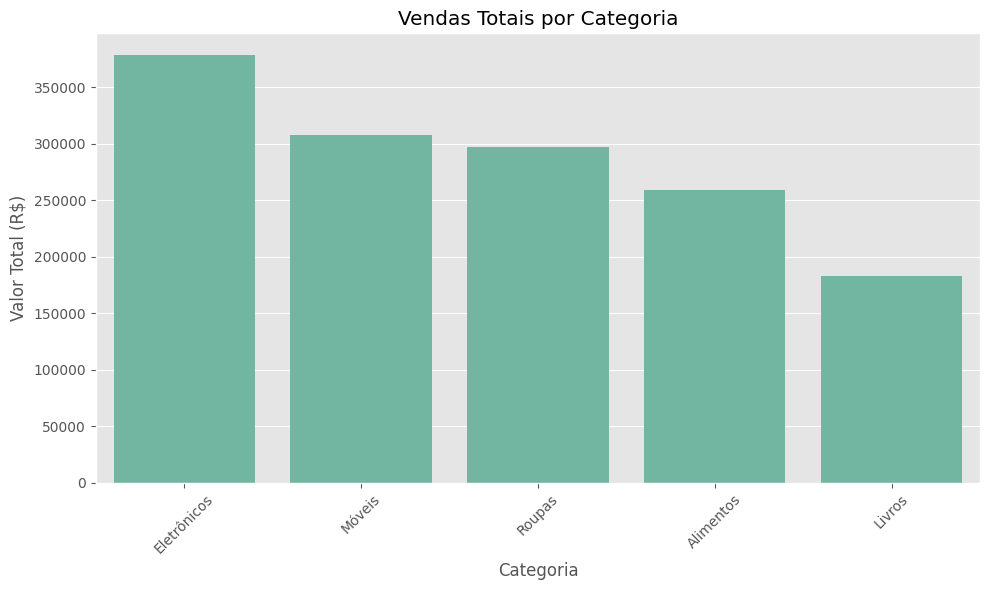

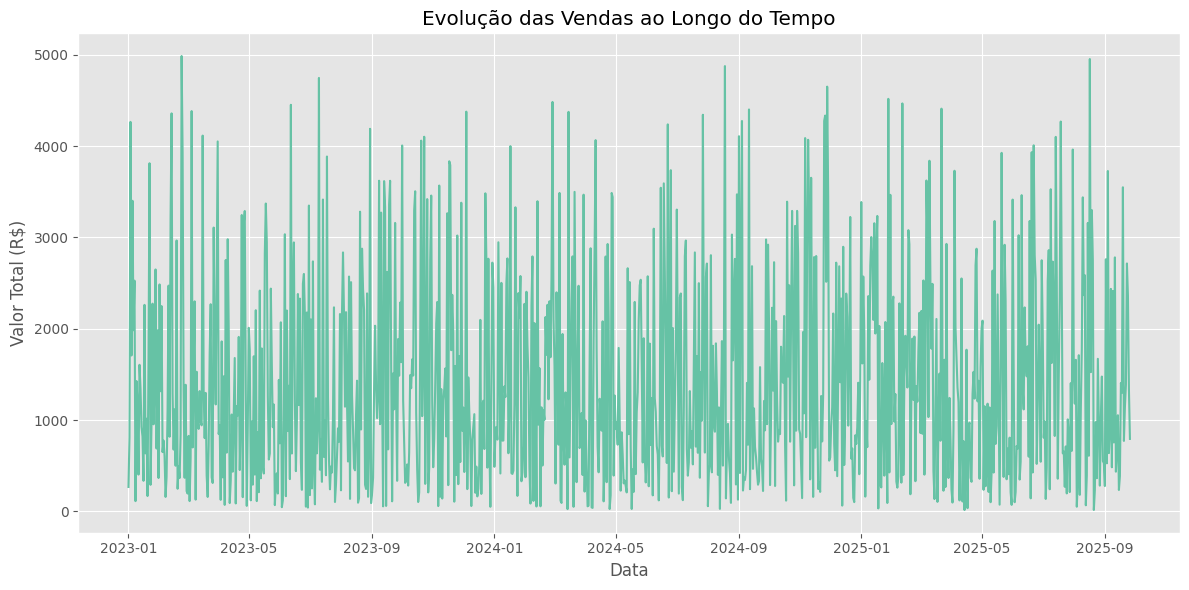

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
plt.style.use('ggplot')
sns.set_palette("Set2")

# Consulta para obter dados para visualização
vendas_categoria = con.execute("""
    SELECT
        p.categoria,
        SUM(v.valor_total) as valor_total
    FROM vendas v
    JOIN produtos p ON v.id_produto = p.id_produto
    GROUP BY p.categoria
    ORDER BY valor_total DESC
""").df()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='categoria', y='valor_total', data=vendas_categoria)
plt.title('Vendas Totais por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('vendas_por_categoria.png')
plt.show()
plt.close()

# Consulta para série temporal
vendas_temporais = con.execute("""
    SELECT
        data::DATE as data,
        SUM(valor_total) as valor_total
    FROM vendas
    GROUP BY data
    ORDER BY data
""").df()

# Criar gráfico de linha temporal
plt.figure(figsize=(12, 6))
plt.plot(vendas_temporais['data'], vendas_temporais['valor_total'])
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.tight_layout()
plt.savefig('evolucao_vendas.png')
plt.show()
plt.close()

## Técnicas avançadas com DuckDB

### 1. Janelas deslizantes e funções de janela

In [25]:
# Calculando ranking de produtos por vendas dentro de cada categoria
resultado = con.execute("""
    SELECT
        p.categoria,
        p.id_produto,
        p.nome,
        SUM(v.quantidade) as unidades_vendidas,
        RANK() OVER (PARTITION BY p.categoria ORDER BY SUM(v.quantidade) DESC) as ranking
    FROM vendas v
    JOIN produtos p ON v.id_produto = p.id_produto
    GROUP BY p.categoria, p.id_produto, p.nome
    QUALIFY ranking <= 3
    ORDER BY p.categoria, ranking
""").df()

print("Top 3 produtos mais vendidos por categoria:")
display(resultado)

# Calculando percentual de participação nas vendas
resultado = con.execute("""
    WITH vendas_categoria AS (
        SELECT
            p.categoria,
            SUM(v.valor_total) as valor_total_categoria
        FROM vendas v
        JOIN produtos p ON v.id_produto = p.id_produto
        GROUP BY p.categoria
    )
    SELECT
        v.categoria,
        v.valor_total_categoria,
        (SELECT SUM(valor_total) FROM vendas) as valor_total_geral,
        (v.valor_total_categoria / (SELECT SUM(valor_total) FROM vendas)) * 100 as percentual
    FROM vendas_categoria v
    ORDER BY percentual DESC
""").df()

print("\nParticipação de cada categoria no total de vendas:")
display(resultado)

Top 3 produtos mais vendidos por categoria:


,categoria,id_produto,nome,unidades_vendidas,ranking
0,Alimentos,49,Produto 49,158.0,1
1,Alimentos,35,Produto 35,156.0,2
2,Alimentos,48,Produto 48,121.0,3
3,Eletrônicos,5,Produto 5,146.0,1
4,Eletrônicos,37,Produto 37,132.0,2
5,Eletrônicos,41,Produto 41,126.0,3
6,Livros,45,Produto 45,137.0,1
7,Livros,16,Produto 16,115.0,2
8,Livros,32,Produto 32,115.0,2
9,Móveis,28,Produto 28,169.0,1



Participação de cada categoria no total de vendas:


,categoria,valor_total_categoria,valor_total_geral,percentual
0,Eletrônicos,378976.70,1425862.53,26.578768
1,Móveis,307605.40,1425862.53,21.573286
2,Roupas,297229.11,1425862.53,20.845566
3,Alimentos,259109.67,1425862.53,18.172135
4,Livros,182941.65,1425862.53,12.830245


### 2. Pivotamento de dados

In [26]:
# Criando uma tabela pivotada de vendas por estado e categoria
resultado = con.execute("""
    SELECT * FROM (
        SELECT
            c.estado,
            p.categoria,
            SUM(v.valor_total) as valor_total
        FROM vendas v
        JOIN clientes c ON v.id_cliente = c.id_cliente
        JOIN produtos p ON v.id_produto = p.id_produto
        GROUP BY c.estado, p.categoria
    )
    PIVOT (
        SUM(valor_total) FOR categoria IN
        ('Eletrônicos', 'Móveis', 'Roupas', 'Alimentos', 'Livros')
    )
    ORDER BY estado
""").df()

print("Tabela pivotada de vendas por estado e categoria:")
display(resultado)

Tabela pivotada de vendas por estado e categoria:


,estado,Eletrônicos,Móveis,Roupas,Alimentos,Livros
0,BA,22663.72,30086.93,13592.79,23671.34,19321.20
1,DF,26641.21,14960.63,35654.26,16957.36,22761.38
2,GO,19802.86,25762.33,27470.09,21730.00,13737.12
3,MG,47955.57,33240.84,26525.95,20408.30,13593.16
4,PE,65319.06,42268.09,56095.63,31942.09,18240.33
5,PR,31534.77,38773.15,22464.49,23258.19,21777.45
6,RJ,50247.40,36698.49,21891.76,27028.72,15028.05
7,RS,25999.99,21103.62,20418.10,35759.25,7922.36
8,SC,38089.48,28645.08,33129.04,33063.69,34393.36
9,SP,50722.64,36066.24,39987.00,25290.73,16167.24


### 3. Utilizando extensões do DuckDB

In [27]:
# Carregando extensão de funções estatísticas
con.execute("INSTALL spatial")
con.execute("LOAD spatial")

# Após carregar a extensão espacial, podemos realizar operações geoespaciais

# Passo 1: Adicionar as colunas latitude e longitude
con.execute("""
    ALTER TABLE clientes 
    ADD COLUMN latitude DOUBLE;
""")

con.execute("""
    ALTER TABLE clientes 
    ADD COLUMN longitude DOUBLE;
""")

# Passo 2: Vamos simular algumas coordenadas para os clientes
con.execute("""
    UPDATE clientes
    SET
        latitude = RANDOM() * 10 + 10,
        longitude = RANDOM() * 10 - 50
    WHERE true
""")

# Consulta que utiliza funções geoespaciais
resultado = con.execute("""
    SELECT
        id_cliente,
        nome,
        estado,
        latitude,
        longitude,
        ST_Point(longitude, latitude) as ponto,
        ST_Distance(
            ST_Point(longitude, latitude),
            ST_Point(-46.6388, -23.5489)  -- São Paulo
        ) as distancia_sp
    FROM clientes
    ORDER BY distancia_sp
    LIMIT 10
""").df()

print("\nClientes mais próximos de São Paulo:")
display(resultado)


Clientes mais próximos de São Paulo:


,id_cliente,nome,estado,latitude,longitude,ponto,distancia_sp
0,13,Cliente 13,GO,10.022648,-49.307420,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",33.677446
1,62,Cliente 62,PR,10.071541,-44.186408,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",33.709765
2,42,Cliente 42,SC,10.271195,-47.685928,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",33.836301
3,83,Cliente 83,PE,10.260065,-48.007846,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",33.836673
4,158,Cliente 158,SP,10.261981,-48.556544,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",33.865224
5,60,Cliente 60,MG,10.237621,-49.653874,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",33.920785
6,17,Cliente 17,RJ,10.473658,-46.459082,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",34.023033
7,109,Cliente 109,DF,10.384825,-43.258282,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",34.101695
8,123,Cliente 123,PE,10.569582,-46.268365,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",34.120493
9,164,Cliente 164,MG,10.570347,-44.126829,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",34.211591


## Persistência de Dados em Disco

### Criando e usando arquivos .duckdb persistentes

In [28]:
import os

# 1. Criar banco de dados persistente
# Se o arquivo não existir, será criado automaticamente
con_persistente = duckdb.connect('empresa.duckdb')

# 2. Criar esquemas e tabelas persistentes
con_persistente.execute("""
    CREATE SCHEMA IF NOT EXISTS vendas_schema;
    CREATE SCHEMA IF NOT EXISTS analytics_schema;
""")

# 3. Transferir dados para o banco persistente
con_persistente.execute("""
    CREATE OR REPLACE TABLE vendas_schema.vendas AS
    SELECT * FROM read_csv_auto('vendas.csv')
""")

con_persistente.execute("""
    CREATE OR REPLACE TABLE vendas_schema.produtos AS
    SELECT * FROM read_parquet('produtos.parquet')
""")

con_persistente.execute("""
    CREATE OR REPLACE TABLE vendas_schema.clientes AS
    SELECT * FROM read_json('clientes.json', auto_detect=TRUE)
""")

# 4. Criar índices para melhor performance
con_persistente.execute("""
    CREATE INDEX idx_vendas_data ON vendas_schema.vendas(data);
    CREATE INDEX idx_vendas_produto ON vendas_schema.vendas(id_produto);
    CREATE INDEX idx_vendas_cliente ON vendas_schema.vendas(id_cliente);
""")

# 5. Criar views materializadas para consultas frequentes
con_persistente.execute("""
    CREATE OR REPLACE TABLE analytics_schema.vendas_diarias AS
    SELECT
        data::DATE as data,
        COUNT(*) as num_vendas,
        SUM(valor_total) as valor_total,
        AVG(valor_total) as ticket_medio
    FROM vendas_schema.vendas
    GROUP BY data::DATE
    ORDER BY data
""")

print("Banco de dados persistente criado com sucesso!")

# 6. Verificar tamanho do arquivo
tamanho_mb = os.path.getsize('empresa.duckdb') / (1024 * 1024)
print(f"Tamanho do arquivo: {tamanho_mb:.2f} MB")

# 7. Listar tabelas e esquemas
esquemas = con_persistente.execute("""
    SELECT table_schema, table_name, table_type
    FROM information_schema.tables
    WHERE table_schema NOT IN ('information_schema', 'pg_catalog')
    ORDER BY table_schema, table_name
""").df()

print("\nTabelas no banco de dados:")
display(esquemas)

Banco de dados persistente criado com sucesso!
Tamanho do arquivo: 2.01 MB

Tabelas no banco de dados:


,table_schema,table_name,table_type
0,analytics_schema,vendas_diarias,BASE TABLE
1,vendas_schema,clientes,BASE TABLE
2,vendas_schema,produtos,BASE TABLE
3,vendas_schema,vendas,BASE TABLE


### Backup e Restore

In [29]:
# Backup de tabelas específicas
con_persistente.execute("""
    EXPORT DATABASE 'backup_empresa' (FORMAT PARQUET)
""")

# Backup completo do banco
con_persistente.execute("""
    VACUUM
""")

con_persistente.close()

if os.path.exists('empresa_restore.duckdb'):
    os.remove('empresa_restore.duckdb')

# Restaurar de backup
con_restore = duckdb.connect('empresa_restore.duckdb')
con_restore.execute("""
    IMPORT DATABASE 'backup_empresa'
""")

# Verificar integridade
resultado = con_restore.execute("""
    SELECT 
        schema_name,
        table_name,
        COUNT(*) as num_registros
    FROM (
        SELECT 'vendas_schema' as schema_name, 'vendas' as table_name, COUNT(*) 
        FROM vendas_schema.vendas
        UNION ALL
        SELECT 'vendas_schema' as schema_name, 'produtos' as table_name, COUNT(*) 
        FROM vendas_schema.produtos
        UNION ALL
        SELECT 'vendas_schema' as schema_name, 'clientes' as table_name, COUNT(*) 
        FROM vendas_schema.clientes
    ) t
    GROUP BY schema_name, table_name
""").df()

print("Verificação de integridade do backup:")
display(resultado)
con_restore.close()

Verificação de integridade do backup:


,schema_name,table_name,num_registros
0,vendas_schema,produtos,1
1,vendas_schema,vendas,1
2,vendas_schema,clientes,1


### Conexão remota e compartilhamento

In [30]:
# Configurar para acesso read-only
con_readonly = duckdb.connect('empresa.duckdb', read_only=True)

# Configurações para múltiplas conexões
# (DuckDB permite múltiplas conexões read-only simultaneamente)
con1 = duckdb.connect('empresa.duckdb', read_only=True)
con2 = duckdb.connect('empresa.duckdb', read_only=True)

# Consulta simultânea
resultado1 = con1.execute("SELECT COUNT(*) FROM vendas_schema.vendas").fetchall()
resultado2 = con2.execute("SELECT COUNT(*) FROM vendas_schema.produtos").fetchall()

print(f"Vendas: {resultado1[0][0]}")
print(f"Produtos: {resultado2[0][0]}")

# Fechar conexões adequadamente
con1.close()
con2.close()
con_readonly.close()

Vendas: 1000
Produtos: 50


# Integração DuckDB com Oracle

## Visão Geral

Atualmente, o DuckDB não possui uma extensão nativa (`oracle_fdw`) para integração direta com bancos de dados Oracle, diferentemente do PostgreSQL que já possui essa funcionalidade implementada. No entanto, existem alternativas práticas para realizar a transferência de dados entre DuckDB e Oracle.

## Abordagem com Bibliotecas Python

A abordagem mais direta é utilizar conexões separadas para cada banco de dados através de suas respectivas bibliotecas Python:


In [31]:
# # Usando conexões separadas para DuckDB e Oracle
# import duckdb
# import cx_Oracle  # Biblioteca Python para Oracle
#
# # Conexão com DuckDB
# con_duck = duckdb.connect('database.db')
#
# # Conexão com Oracle
# oracle_connection = cx_Oracle.connect(
#     user="system",      # Alterável: seu usuário Oracle
#     password="oracle",  # Alterável: sua senha Oracle
#     dsn="localhost:1521/XE"  # Alterável: endereço/porta/serviço Oracle
# )
# oracle_cursor = oracle_connection.cursor()
#
# # Extraindo dados do DuckDB
# dados_vendas = con_duck.execute("""
#     SELECT id_venda, data, id_produto, id_cliente,
#            quantidade, valor_unitario, valor_total
#     FROM vendas
#     WHERE valor_total > 1000
# """).fetchnumpy()
#
# # Preparando a tabela no Oracle (se necessário)
# oracle_cursor.execute("""
#     CREATE TABLE VENDAS (
#         id_venda NUMBER,
#         data DATE,
#         id_produto NUMBER,
#         id_cliente NUMBER,
#         quantidade NUMBER,
#         valor_unitario NUMBER(10,2),
#         valor_total NUMBER(10,2)
#     )
# """)
#
# # Inserindo dados no Oracle via cx_Oracle
# oracle_cursor.executemany("""
#     INSERT INTO VENDAS VALUES (:1, :2, :3, :4, :5, :6, :7)
# """, zip(
#     dados_vendas['id_venda'],
#     dados_vendas['data'],
#     dados_vendas['id_produto'],
#     dados_vendas['id_cliente'],
#     dados_vendas['quantidade'],
#     dados_vendas['valor_unitario'],
#     dados_vendas['valor_total']
# ))
# oracle_connection.commit()
#
# # Verificando os dados transferidos
# oracle_cursor.execute("SELECT COUNT(*), SUM(valor_total) FROM VENDAS")
# resultado = oracle_cursor.fetchone()
# print("\nDados transferidos para Oracle:")
# print(f"Contagem: {resultado[0]}, Soma: {resultado[1]}")
#
# # Fechando conexões
# oracle_cursor.close()
# oracle_connection.close()

## Status de Desenvolvimento

A comunidade DuckDB está considerando implementar Foreign Data Wrappers nativos, conforme discussão no GitHub ([Discussion #2728](https://github.com/duckdb/duckdb/discussions/2728)). Se a integração com Oracle é importante para o seu caso de uso, considere:

1. Acompanhar o desenvolvimento desta funcionalidade
2. Contribuir para o desenvolvimento da extensão
3. Por enquanto, utilizar uma das abordagens alternativas descritas acima

## Conclusão

Embora não exista ainda uma integração nativa entre DuckDB e Oracle, as alternativas apresentadas oferecem caminhos viáveis para transferência de dados entre estes sistemas.

## Otimizações para grandes volumes de dados

In [32]:
# Configurando opções de memória e threads
con.execute("""
    SET memory_limit = '4GB';  -- Limitar uso de memória
    SET threads = 4;  -- Definir número de threads
""")

# Criando índices para consultas mais rápidas
con.execute("""
    DROP INDEX IF EXISTS idx_vendas_data;
    CREATE INDEX idx_vendas_data ON vendas(data);

    DROP INDEX IF EXISTS idx_vendas_produto;
    CREATE INDEX idx_vendas_produto ON vendas(id_produto);

    DROP INDEX IF EXISTS idx_vendas_cliente;
    CREATE INDEX idx_vendas_cliente ON vendas(id_cliente);
""")

# Análise do plano de execução
plano = con.execute("""
    EXPLAIN
    SELECT
        p.categoria,
        c.segmento,
        SUM(v.valor_total) as valor_total
    FROM vendas v
    JOIN produtos p ON v.id_produto = p.id_produto
    JOIN clientes c ON v.id_cliente = c.id_cliente
    WHERE v.data BETWEEN '2023-03-01' AND '2023-03-31'
    GROUP BY p.categoria, c.segmento
""").fetchone()[1]

def exibir_plano_colorido(plano):
    """Exibe o plano de execução com destaque colorido para operações principais"""
    import re
    from colorama import Fore, Style, init
    
    # Inicializar colorama (necessário no Windows)
    init()
    
    # Destacar elementos do plano
    plano = re.sub(r'(PROJECTION|HASH_JOIN|HASH_GROUP_BY|SEQ_SCAN)', 
                  Fore.GREEN + r'\1' + Style.RESET_ALL, plano)
    plano = re.sub(r'(Join Type: [A-Z]+)', 
                  Fore.YELLOW + r'\1' + Style.RESET_ALL, plano)
    plano = re.sub(r'(Table: [a-z]+)', 
                  Fore.CYAN + r'\1' + Style.RESET_ALL, plano)
    plano = re.sub(r'(Filters:.+)', 
                  Fore.RED + r'\1' + Style.RESET_ALL, plano, flags=re.DOTALL)
    
    print(plano)

print("\nPlano de execução:")
exibir_plano_colorido(plano)
con.close()


Plano de execução:
┌───────────────────────────┐
│         PROJECTION        │
│    ────────────────────   │
│__internal_decompress_strin│
│           g(#0)           │
│__internal_decompress_strin│
│           g(#1)           │
│             #2            │
│                           │
│          ~97 Rows         │
└─────────────┬─────────────┘
┌─────────────┴─────────────┐
│       HASH_GROUP_BY       │
│    ────────────────────   │
│          Groups:          │
│             #0            │
│             #1            │
│                           │
│    Aggregates: sum(#2)    │
│                           │
│          ~97 Rows         │
└─────────────┬─────────────┘
┌─────────────┴─────────────┐
│         PROJECTION        │
│    ────────────────────   │
│         categoria         │
│          segmento         │
│        valor_total        │
│                           │
│         ~195 Rows         │
└─────────────┬─────────────┘
┌─────────────┴─────────────┐
│         PROJECTION

## Integração com Machine Learning

O DuckDB é uma excelente ferramenta para preparação de dados para machine learning, permitindo executar transformações e agregações eficientes antes de alimentar os dados em modelos de ML. Neste exemplo, vamos demonstrar como utilizar o DuckDB em conjunto com o scikit-learn para criar um modelo de classificação simples.

## Criando dados de exemplo

Vamos usar o conjunto de dados de vendas e adicionar uma coluna de classificação para demonstração;


In [33]:
#import duckdb
#import pandas as pd
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt

con = duckdb.connect(':memory:')
con.execute("""
CREATE TABLE vendas AS
SELECT
    '2023-01-01'::DATE + (CAST(RANDOM() * 365 AS INTEGER))::INTEGER AS data_venda,
    CAST(RANDOM() * 1000 AS INTEGER) + 100 AS valor_venda,
    (ARRAY['Online', 'Loja Física', 'Telefone'])[1 + CAST(RANDOM() * 3 AS INTEGER)] AS canal,
    (ARRAY['Produto A', 'Produto B', 'Produto C', 'Produto D'])[1 + CAST(RANDOM() * 4 AS INTEGER)] AS produto,
    CASE
        WHEN RANDOM() > 0.5 THEN TRUE
        ELSE FALSE
    END AS cliente_recorrente
FROM range(1000)
""")

display(con.execute("FROM vendas limit 10;").df())

,data_venda,valor_venda,canal,produto,cliente_recorrente
0,2023-08-09,911,None,Produto B,True
1,2023-12-30,364,Loja Física,Produto B,True
2,2023-11-08,893,Telefone,Produto C,False
3,2023-08-21,706,Loja Física,Produto A,True
4,2023-03-03,194,Online,Produto C,True
5,2023-02-17,186,Loja Física,Produto C,False
6,2023-01-31,420,None,Produto D,False
7,2023-05-30,681,None,Produto D,False
8,2023-07-22,731,Telefone,Produto D,False
9,2023-04-24,727,Loja Física,Produto D,True


## Preparando dados para Machine Learning usando DuckDB

Uma das grandes vantagens do DuckDB é poder realizar transformações complexas diretamente no banco de dados, antes de converter para um DataFrame do Pandas para alimentar os modelos de ML.

In [34]:
# Usando DuckDB para engenharia de features
features_df = con.execute("""
SELECT
    -- Extraindo características da data
    EXTRACT(MONTH FROM data_venda) AS mes,
    EXTRACT(DAY FROM data_venda) AS dia_do_mes,
    EXTRACT(DOW FROM data_venda) AS dia_da_semana,

    -- Transformando valores de venda
    valor_venda,
    LOG(valor_venda) AS log_valor_venda,

    -- Criando variáveis dummy para canais
    CASE WHEN canal = 'Online' THEN 1 ELSE 0 END AS canal_online,
    CASE WHEN canal = 'Loja Física' THEN 1 ELSE 0 END AS canal_loja_fisica,
    CASE WHEN canal = 'Telefone' THEN 1 ELSE 0 END AS canal_telefone,

    -- Criando variáveis dummy para produtos
    CASE WHEN produto = 'Produto A' THEN 1 ELSE 0 END AS produto_a,
    CASE WHEN produto = 'Produto B' THEN 1 ELSE 0 END AS produto_b,
    CASE WHEN produto = 'Produto C' THEN 1 ELSE 0 END AS produto_c,
    CASE WHEN produto = 'Produto D' THEN 1 ELSE 0 END AS produto_d,

    -- Nossa variável alvo
    cliente_recorrente
FROM vendas
""").df()

# Verificando as features criadas
display(features_df.head())

,mes,dia_do_mes,dia_da_semana,valor_venda,log_valor_venda,canal_online,canal_loja_fisica,canal_telefone,produto_a,produto_b,produto_c,produto_d,cliente_recorrente
0,8,9,3,911,2.959518,0,0,0,0,1,0,0,True
1,12,30,6,364,2.561101,0,1,0,0,1,0,0,True
2,11,8,3,893,2.950851,0,0,1,0,0,1,0,False
3,8,21,1,706,2.848805,0,1,0,1,0,0,0,True
4,3,3,5,194,2.287802,1,0,0,0,0,1,0,True


## Análise exploratória usando DuckDB

Podemos usar o DuckDB para realizar análises exploratórias rápidas antes de treinar os modelos:

In [35]:
# Estatísticas por canal
estatisticas_canal = con.execute("""
SELECT
    canal,
    COUNT(*) AS total_vendas,
    AVG(valor_venda) AS media_valor,
    SUM(CASE WHEN cliente_recorrente THEN 1 ELSE 0 END) / COUNT(*)::FLOAT AS taxa_recorrencia
FROM vendas
GROUP BY canal
ORDER BY total_vendas DESC
""").df()

print("Estatísticas por canal:")
print(estatisticas_canal)

# Correlação entre valor de venda e probabilidade de cliente recorrente
correlacao = con.execute("""
SELECT
    CORR(valor_venda, CAST(cliente_recorrente AS INTEGER)) AS correlacao_valor_recorrencia
FROM vendas
""").fetchone()[0]

print(f"\nCorrelação entre valor de venda e cliente recorrente: {correlacao:.4f}")

Estatísticas por canal:
         canal  total_vendas  media_valor  taxa_recorrencia
0     Telefone           350   604.068571          0.517143
1  Loja Física           321   589.538941          0.529595
2         None           166   568.879518          0.487952
3       Online           163   563.104294          0.533742

Correlação entre valor de venda e cliente recorrente: 0.0070


## Treinando o modelo de Machine Learning

Agora, vamos usar as features preparadas com DuckDB para treinar um modelo de classificação:

In [36]:
# Preparando os dados
X = features_df.drop('cliente_recorrente', axis=1)
y = features_df['cliente_recorrente']

# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados numéricos
scaler = StandardScaler()
numeric_cols = ['mes', 'dia_do_mes', 'dia_da_semana', 'valor_venda', 'log_valor_venda']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Treinando um modelo RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância das features:")
print(feature_importance.head(10))

Acurácia do modelo: 0.5067

Relatório de classificação:
              precision    recall  f1-score   support

       False       0.53      0.41      0.46       155
        True       0.49      0.61      0.55       145

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.51      0.51      0.50       300


Importância das features:
              Feature  Importance
4     log_valor_venda    0.206250
3         valor_venda    0.200134
1          dia_do_mes    0.168626
0                 mes    0.142570
2       dia_da_semana    0.108444
11          produto_d    0.029742
7      canal_telefone    0.027658
6   canal_loja_fisica    0.026203
10          produto_c    0.025762
9           produto_b    0.024485


## Usando DuckDB para consultar os resultados e armazenar previsões

Agora podemos usar o DuckDB para armazenar as previsões e realizar consultas analíticas sobre elas:

Análise de resultados por faixa de probabilidade:


,faixa_probabilidade,total_clientes,previsoes_corretas,taxa_acerto
0,Alta (>= 75%),15,4.0,0.266667
1,Média (50-75%),172,87.0,0.505814
2,Baixa (25-50%),106,57.0,0.537736
3,Muito Baixa (< 25%),7,4.0,0.571429


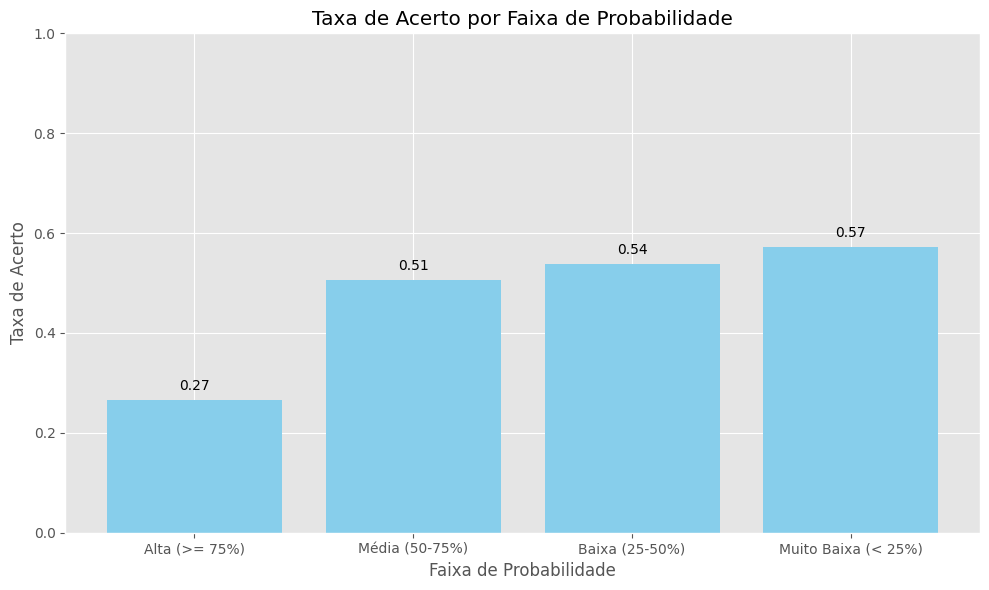

In [37]:
# Convertendo as previsões para um DataFrame
predictions_df = X_test.copy()
predictions_df['cliente_recorrente_real'] = y_test.values
predictions_df['cliente_recorrente_previsto'] = y_pred
predictions_df['probabilidade'] = model.predict_proba(X_test)[:, 1]

# Registrando o DataFrame no DuckDB
con.register('predictions', predictions_df)

# Analisando os resultados usando SQL
analise_resultados = con.execute("""
SELECT
    CASE
        WHEN probabilidade >= 0.75 THEN 'Alta (>= 75%)'
        WHEN probabilidade >= 0.5 THEN 'Média (50-75%)'
        WHEN probabilidade >= 0.25 THEN 'Baixa (25-50%)'
        ELSE 'Muito Baixa (< 25%)'
    END AS faixa_probabilidade,
    COUNT(*) AS total_clientes,
    SUM(CASE WHEN cliente_recorrente_real = cliente_recorrente_previsto THEN 1 ELSE 0 END) AS previsoes_corretas,
    SUM(CASE WHEN cliente_recorrente_real = cliente_recorrente_previsto THEN 1 ELSE 0 END) / COUNT(*)::FLOAT AS taxa_acerto
FROM predictions
GROUP BY faixa_probabilidade
ORDER BY
    CASE faixa_probabilidade
        WHEN 'Alta (>= 75%)' THEN 1
        WHEN 'Média (50-75%)' THEN 2
        WHEN 'Baixa (25-50%)' THEN 3
        ELSE 4
    END
""").df()

print("Análise de resultados por faixa de probabilidade:")
display(analise_resultados)

# Visualizando os resultados
plt.figure(figsize=(10, 6))
plt.bar(analise_resultados['faixa_probabilidade'], analise_resultados['taxa_acerto'], color='skyblue')
plt.xlabel('Faixa de Probabilidade')
plt.ylabel('Taxa de Acerto')
plt.title('Taxa de Acerto por Faixa de Probabilidade')
plt.ylim(0, 1)
for i, v in enumerate(analise_resultados['taxa_acerto']):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

## Pipeline completo: do DuckDB ao deploy em produção

Para finalizar, vamos demonstrar como seria um pipeline completo utilizando DuckDB para preparação de dados e scikit-learn para Machine Learning:

In [38]:
def pipeline_completo(nova_venda):
    """
    Pipeline completo para processar uma nova venda e prever se será um cliente recorrente
    """
    # 1. Registrar a nova venda no DuckDB
    con.execute("""
    INSERT INTO vendas VALUES
    (?, ?, ?, ?, ?)
    """, [nova_venda['data_venda'], nova_venda['valor_venda'],
          nova_venda['canal'], nova_venda['produto'], False])

    # 2. Extrair features usando DuckDB
    features = con.execute("""
    SELECT
        EXTRACT(MONTH FROM data_venda) AS mes,
        EXTRACT(DAY FROM data_venda) AS dia_do_mes,
        EXTRACT(DOW FROM data_venda) AS dia_da_semana,
        valor_venda,
        LOG(valor_venda) AS log_valor_venda,
        CASE WHEN canal = 'Online' THEN 1 ELSE 0 END AS canal_online,
        CASE WHEN canal = 'Loja Física' THEN 1 ELSE 0 END AS canal_loja_fisica,
        CASE WHEN canal = 'Telefone' THEN 1 ELSE 0 END AS canal_telefone,
        CASE WHEN produto = 'Produto A' THEN 1 ELSE 0 END AS produto_a,
        CASE WHEN produto = 'Produto B' THEN 1 ELSE 0 END AS produto_b,
        CASE WHEN produto = 'Produto C' THEN 1 ELSE 0 END AS produto_c,
        CASE WHEN produto = 'Produto D' THEN 1 ELSE 0 END AS produto_d
    FROM vendas
    ORDER BY data_venda DESC
    LIMIT 1
    """).df()

    # 3. Normalizar as features numéricas
    features[numeric_cols] = scaler.transform(features[numeric_cols])

    # 4. Fazer a previsão
    probabilidade = model.predict_proba(features)[0, 1]
    previsao = probabilidade >= 0.5

    return {
        'previsao': bool(previsao),
        'probabilidade': float(probabilidade),
        'recomendacao': 'Oferecer programa de fidelidade' if probabilidade >= 0.5 else 'Oferecer desconto na próxima compra'
    }

# Testando o pipeline com uma nova venda
nova_venda = {
    'data_venda': '2023-12-15',
    'valor_venda': 750,
    'canal': 'Online',
    'produto': 'Produto A'
}

resultado = pipeline_completo(nova_venda)
print("Resultado para nova venda:")
print(f"Previsão: Cliente {'recorrente' if resultado['previsao'] else 'não recorrente'}")
print(f"Probabilidade: {resultado['probabilidade']:.2f}")
print(f"Recomendação: {resultado['recomendacao']}")

Resultado para nova venda:
Previsão: Cliente recorrente
Probabilidade: 0.92
Recomendação: Oferecer programa de fidelidade


## Conclusão

Este exemplo demonstra como integrar perfeitamente o DuckDB com bibliotecas de Machine Learning como scikit-learn. As principais vantagens dessa abordagem incluem:

1. **Preparação de dados eficiente**: O DuckDB permite transformações e agregações rápidas, mesmo em conjuntos de dados grandes
2. **Feature engineering com SQL**: Podemos usar SQL para criar features complexas de forma declarativa e legível
3. **Análise exploratória integrada**: Podemos fazer análises estatísticas rapidamente usando SQL antes de passar os dados para o modelo
4. **Pipeline completo**: É possível criar um pipeline end-to-end que vai desde a ingestão de dados até a previsão e armazenamento dos resultados

O DuckDB é particularmente útil na fase de preparação de dados para ML, permitindo processar grandes volumes de dados com menos recursos computacionais que outras soluções. Além disso, o uso de SQL facilita a compreensão e manutenção do pipeline por diferentes membros da equipe.

# Conclusão Geral

Este tutorial abrangeu:

1. **Configuração básica do DuckDB**
   - Instalação e criação de conexões
   - Criação e manipulação de tabelas

2. **Integração com diferentes formatos de dados**
   - CSV, Parquet, JSON
   - Conversão entre DuckDB e pandas

3. **Funcionalidades avançadas**
   - Funções definidas pelo usuário (UDFs)
   - Funções de janela e agregações
   - Pivotamento de dados
   - Extensões para capacidades adicionais

4. **Integração com outras ferramentas**
   - Visualização com matplotlib
   - Persistência em disco, backup/restore e conexões remotas
   - Conexão com bancos Oracle
   - Otimização e planos de execução

5. **Machine Learning - Duckdb e ScikitLearn**
   - Preparação de dados
   - Feature Engineering SQL
   - Análise Exploratória
   - Pipeline e deploy de modelo

DuckDB é uma excelente ferramenta para análise de dados em Python, especialmente quando você precisa de:
- Alto desempenho para consultas analíticas
- Processamento de dados maiores que a memória RAM
- Integração simples com ecossistema Python
- Sintaxe SQL familiar

No seu caso específico de carga de dados para Oracle, você pode usar a abordagem com oracle_fdw para uma transferência direta e eficiente, sem a necessidade de passar por um DataFrame intermediário.

Para saber mais sobre DuckDB, consulte:
- [Documentação oficial](https://duckdb.org/docs/)
- [Referência SQL](https://duckdb.org/docs/sql/introduction)
- [Tutorial de Python](https://duckdb.org/docs/api/python/overview)